# my1stNN

## Goals:

- Code a deep (with at least 1 hidden layer) neural network in tensorflow

- Fit it on the train dataset, estimate quality on the test dataset

- Plot the train loss and test loss as a function of the training iteration number

### Long description

Your ultimate task for this part is to build your first neural network [almost] from scratch and pure tensorflow. This time you will have the same digit recognition problem as for the logistic regression assignment, but at a larger scale:

- images are now 28x28

- 10 different digits

- 50k samples

Note that you are not required to build 152-layer monsters here. A 2-layer (one hidden, one output) NN should already have an edge over logistic regression.

[bonus score] If you've already beaten logistic regression with a two-layer net, but enthusiasm still ain't gone, you can try improving the test accuracy even further! The milestones would be 95%/97.5%/98.5% accuracy on the test set.

Please use the preprocessed_mnist.py in week2 folder to load the data:

## SPOILERS!

### Recommended pipeline:

- Begin with logistic regression from the previous assignment to classify some number against others (e.g. zero vs nonzero)

- Generalize it to multiclass logistic regression. Either try to remember the week 1 lectures or google it.
- Instead of a weights vector you'll have to use a matrix with `shape=(features, classes)`
- softmax (exp over sum of exps) can implemented manually or as `tf.nn.softmax`
- probably better to use STOCHASTIC gradient descent (minibatch)
- in which case sample should probably be shuffled (or use random subsamples on each iteration)

### Add a hidden layer. Now your logistic regression uses hidden neurons instead of inputs.

- Hidden layer uses the same math as output layer (ex-logistic regression), but uses some nonlinearity (sigmoid) instead of softmax
- You need to train both layers, not just output layer :)
- Do not initialize layers with zeros (due to symmetry effects). A gaussian noize with small sigma will do.
- 50 hidden neurons and a sigmoid nonlinearity will do for a start. Many ways to improve here.
- In an ideal case this totals to 2 .dot's, 1 softmax and 1 sigmoid


### Load data

Using TensorFlow backend.


(50000, 28, 28) (50000,)


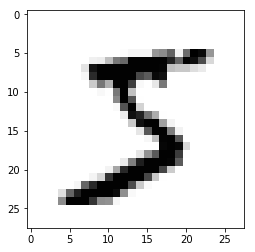

In [1]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

### Import package 


In [2]:
import numpy as np
import tensorflow as tf


### Shape of data

In [3]:
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_val:',X_val.shape)
print('y_val:',y_val.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

X_train: (50000, 28, 28)
y_train: (50000,)
X_val: (10000, 28, 28)
y_val: (10000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [4]:
# Set parameters
node = 50
n_val = 784
n_y = 10

In [5]:
# Reshape data
X_trian_T = np.reshape(X_train,(X_train.shape[0],n_val))
X_val_T = np.reshape(X_val,(X_val.shape[0],n_val))
X_test_T = np.reshape(X_test,(X_test.shape[0],n_val))


In [6]:
# One hot encode
y_all = np.concatenate([y_train,y_val,y_test])

ses_one_hot = tf.Session()
tf_one_hot = tf.one_hot(y_all,n_y,1,0)  
with tf.Session() as sess:  
    sess.run(tf.global_variables_initializer())  
    y_one_hot =sess.run(tf_one_hot)  
print(y_one_hot.shape)
# Check shape
y_train_ot = y_one_hot[:50000,:]
y_val_ot = y_one_hot[50000:60000,:]
y_test_ot = y_one_hot[60000:70000,:]
print(y_train_ot.shape,y_val_ot.shape,y_test_ot.shape)

(70000, 10)
(50000, 10) (10000, 10) (10000, 10)


In [11]:
# Placeholders for the input data
X_input = tf.placeholder(tf.float32, [None,n_val],name="input_X")
y_input = tf.placeholder(tf.float32, [None,n_y],name="input_y")
print (X_input)
print (y_input)

Tensor("input_X_1:0", shape=(?, 784), dtype=float32)
Tensor("input_y_1:0", shape=(?, 10), dtype=float32)


In [12]:
# Set Model Parameters
learning_rate = 0.01

tf.set_random_seed(225)

w1 = tf.get_variable("w1", [n_val, node], dtype="float32", initializer = tf.contrib.layers.xavier_initializer(seed = 225))

w2 = tf.get_variable("w2", [node, n_y], dtype="float32", initializer = tf.contrib.layers.xavier_initializer(seed = 225))

b1 = tf.get_variable("b1", [1, node], dtype="float32", initializer = tf.zeros_initializer())

b2 = tf.get_variable("b2", [1, 10], dtype="float32", initializer = tf.zeros_initializer())

hidden_out = tf.nn.sigmoid(tf.add(tf.matmul(X_input,w1), b1))

predicted_y = tf.add(tf.matmul(hidden_out,w2),b2)

loss = tf.reduce_mean(-tf.reduce_sum(y_input*tf.log(predicted_y), reduction_indices=[1]))

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss

SyntaxError: unexpected EOF while parsing (<ipython-input-12-f7db1d7d7440>, line 20)

In [ ]:
# 